In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
Cl1 = 1.5
Cl2 = 1
Cl3 = 5

W_min = 0.1
W_max = 10

In [3]:
def T1(w):
    return (w[2]+Cl1)*(1/w[0]+1/w[1]+1/w[2]) + w[1]*(1/w[0]+1/w[1]) + (w[0]+w[3]+w[4]+w[5]+Cl2+Cl3)/w[0]

def T2(w):
    return (w[4]+Cl2)*(1/w[0]+1/w[3]+1/w[4]) + w[3]*(1/w[0]+1/w[3]) + (w[5]+Cl3)*(1/w[0]+1/w[3]) + (w[0]+w[1]+w[2]+Cl1)/w[0]

def T3(w):
    return (w[5]+Cl3)*(1/w[0]+1/w[3]+1/w[5]) + w[3]*(1/w[0]+1/w[3]) + (w[0]+w[1]+w[2]+Cl1)/w[0] + (w[4]+Cl2)*(1/w[0]+1/w[3])

### Equal Wire Widths

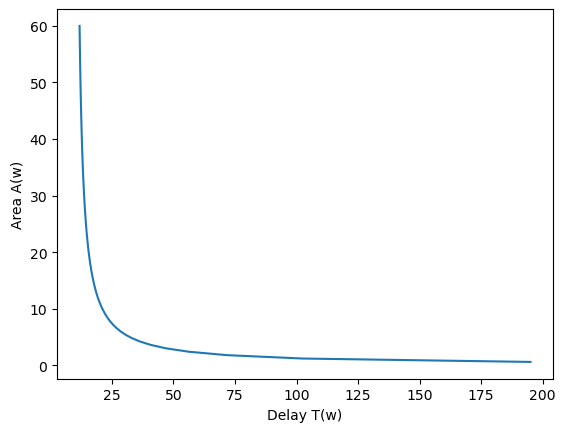

In [4]:
w = np.ones((6,1)) * np.linspace(W_min, W_max, 100)

T = np.maximum(np.maximum(T1(w), T2(w)), T3(w))
A = np.sum(w, axis=0)

plt.plot(T, A)
plt.xlabel("Delay T(w)")
plt.ylabel("Area A(w)")
plt.show()

### Optimal Wire Widths

In [5]:
def build_problem(u=1):
    w = cp.Variable(6, pos=True)
    t = cp.Variable(pos=True)

    constraints = [W_min <= w, w <= W_max, T1(w) <= t, T2(w) <= t, T3(w) <= t]
    objective = cp.Minimize(cp.sum(w) + u * t)

    return cp.Problem(objective, constraints)

print("Is this problem DGP?", build_problem().is_dgp())

Is this problem DGP? True


In [6]:
u_vals = np.logspace(-3, 3, num=30)

A_opt = []
T_opt = []

for u in u_vals:
    prob = build_problem(u)
    result = prob.solve(gp=True, solver=cp.ECOS)
    w = prob.variables()[0].value
    t = prob.variables()[1].value
    A_opt.append(np.sum(w))
    T_opt.append(t)

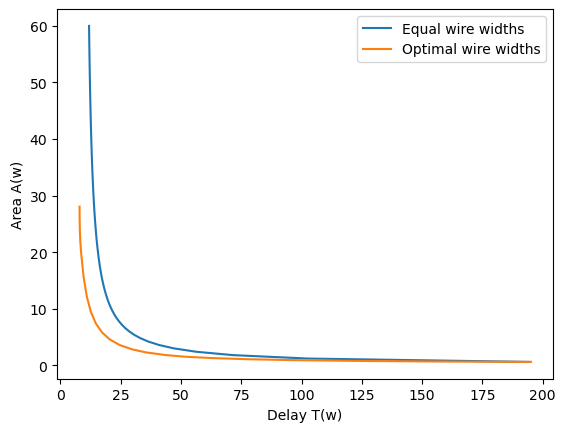

In [7]:
plt.plot(T, A, label="Equal wire widths")
plt.plot(T_opt, A_opt, label="Optimal wire widths")
plt.xlabel("Delay T(w)")
plt.ylabel("Area A(w)")
plt.legend()
plt.show()

The optimal trade-off curve outperforms the equal wire width curve in terms of both cost functions.